In [1]:
import pandas as pd
import numpy as np
import operator as op
import os
import urllib
import string
from ggplot import *
from IPython.display import IFrame
from PIL import Image
import colorsys
from sklearn import feature_selection
import seaborn as sns
import webcolors
from __future__ import unicode_literals
import itertools

%matplotlib inline

In [2]:
## Load in the dataset
df = pd.read_csv('../data/pycon.csv')

In [3]:
df.head()

,cf_index,cf_score,cf_target_market,cf_serving_size,cf_sugar_result,cf_fiber_result,cf_sodium_result,cf_sugar_per_serving,cf_fiber_per_serving,cf_sodium_per_serving,...,b_sd,g_sd,r_sd,most_frequent_colour,most_frequent_colour_count,most_dominant_colour,url,cover_image_url,fn,fn_cropped
0,1,50,Family,29,24%,3%,293,7,1,85,...,54.28,86.32,62.01,#e70000,256,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Ann...,img_001_anniesfruitybunnies.jpg,img_001_anniesfruitybunnies_cropped.png
1,2,52,Family,29,24%,3%,310,7,1,90,...,46.53,48.07,54.99,#d8501e,256,brown,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Ann...,img_002_annieshoneybunnies.jpg,img_002_annieshoneybunnies_cropped.png
2,3,50,Family,29,24%,3%,293,7,1,85,...,52.63,60.91,40.15,#bd582a,256,brown,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Ann...,img_003_anniescinnamonrollbunnyos.jpg,img_003_anniescinnamonrollbunnyos_cropped.png
3,4,64,Family,29,7%,3%,379,2,1,110,...,47.58,71.51,58.18,#581680,1272,brown,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Ann...,img_004_anniesorganicbunnyos.jpg,img_004_anniesorganicbunnyos_cropped.png
4,5,58,Family,30,23%,10%,267,7,3,80,...,48.37,51.09,53.44,#ffffff,681,grey,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Bar...,img_005_barbarasbakerypuffinspuffscrunchycocoa...,img_005_barbarasbakerypuffinspuffscrunchycocoa...


In [4]:
df['r_sd_int'] = [int(x) for x in df.r_sd.values.tolist()]
df['g_sd_int'] = [int(x) for x in df.g_sd.values.tolist()]
df['b_sd_int'] = [int(x) for x in df.b_sd.values.tolist()]

df['cf_sugar_result'] = [int(x.replace('%','')) for x in df.cf_sugar_result.values.tolist()]
df['cf_fiber_result'] = [int(x.replace('%','')) for x in df.cf_fiber_result.values.tolist()]


### Color Std

/Users/DicksonK/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


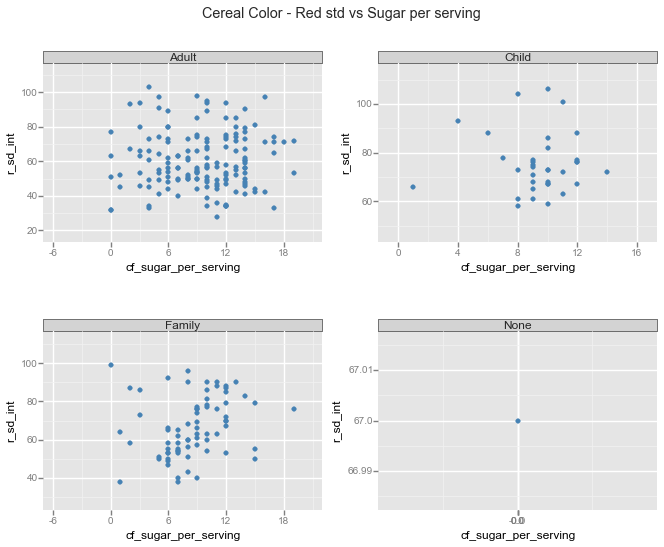

<ggplot: (278856553)>


In [5]:
red_sd_sugar = ggplot(df, aes('cf_sugar_per_serving', 'r_sd_int')) + \
    geom_point(colour='steelblue') +\
    facet_wrap("cf_target_market") + ggtitle("Cereal Color - Red std vs Sugar per serving")
print red_sd_sugar

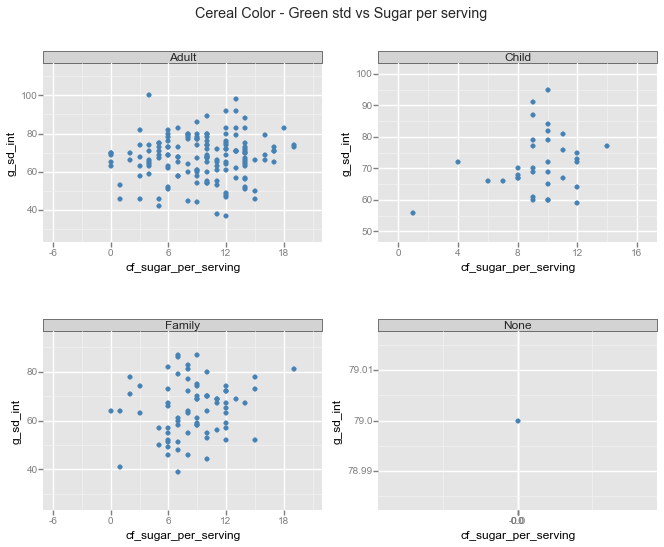

<ggplot: (279384353)>


In [6]:
green_sd_sugar = ggplot(df, aes('cf_sugar_per_serving', 'g_sd_int')) + \
    geom_point(colour='steelblue') +\
    facet_wrap("cf_target_market") + ggtitle("Cereal Color - Green std vs Sugar per serving")
print green_sd_sugar

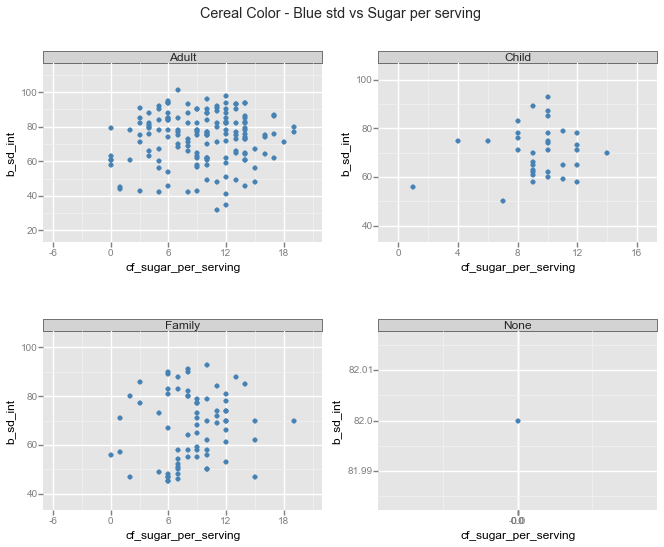

<ggplot: (278996277)>


In [7]:
blue_sd_sugar = ggplot(df, aes('cf_sugar_per_serving', 'b_sd_int')) + \
    geom_point(colour='steelblue') +\
    facet_wrap("cf_target_market") + ggtitle("Cereal Color - Blue std vs Sugar per serving")
print blue_sd_sugar

### Color mean

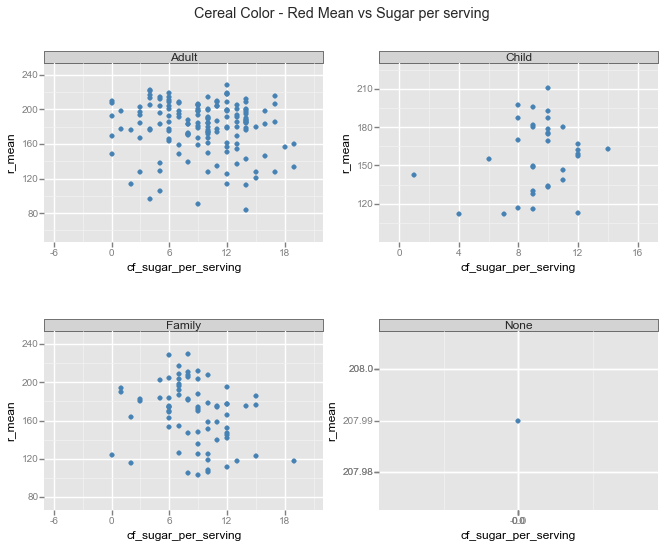

<ggplot: (279345149)>


In [8]:
red_sugar = ggplot(df, aes('cf_sugar_per_serving', 'r_mean')) + \
    geom_point(colour='steelblue') +\
    facet_wrap("cf_target_market") + ggtitle("Cereal Color - Red Mean vs Sugar per serving")
print red_sugar

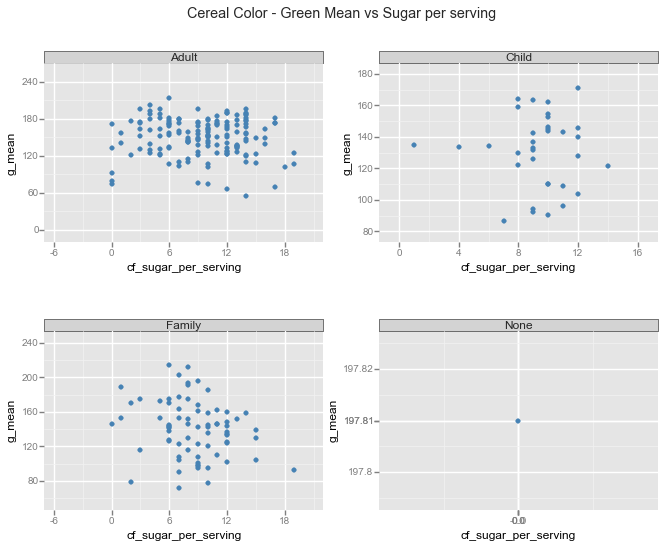

<ggplot: (281569917)>


In [9]:
green_sugar = ggplot(df, aes('cf_sugar_per_serving', 'g_mean')) + \
    geom_point(colour='steelblue') +\
    facet_wrap("cf_target_market") + ggtitle("Cereal Color - Green Mean vs Sugar per serving")
print green_sugar

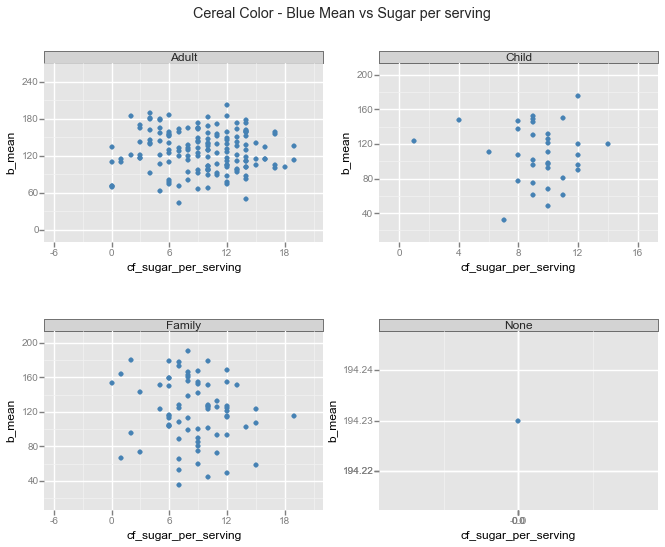

<ggplot: (280735149)>


In [10]:
blue_sugar = ggplot(df, aes('cf_sugar_per_serving', 'b_mean')) + \
    geom_point(colour='steelblue') +\
    facet_wrap("cf_target_market") + ggtitle("Cereal Color - Blue Mean vs Sugar per serving")
print blue_sugar

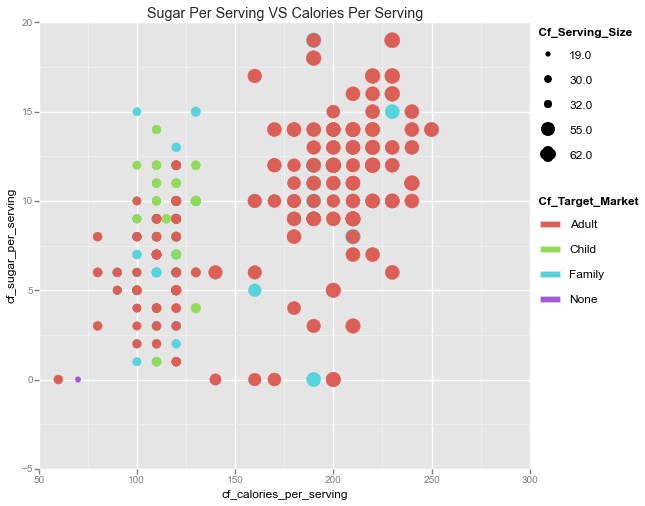

<ggplot: (279373181)>

In [11]:
ggplot(df, aes('cf_calories_per_serving', 'cf_sugar_per_serving', color = 'cf_target_market', size = 'cf_serving_size')) + \
    geom_point() + ggtitle("Sugar Per Serving VS Calories Per Serving")

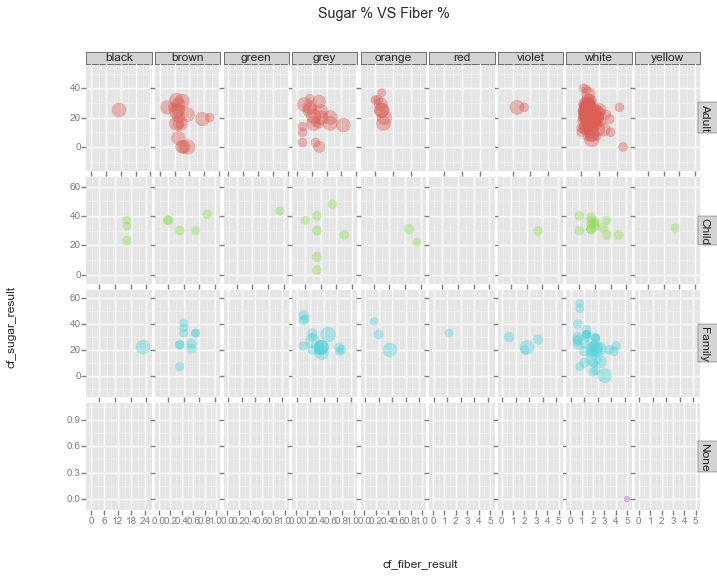

<ggplot: (284757769)>

In [14]:
ggplot(df, aes('cf_fiber_result', 'cf_sugar_result', color = 'cf_target_market', size = 'cf_serving_size')) + \
    geom_jitter(alpha=0.4) + ggtitle("Sugar % VS Fiber %") + \
    facet_grid('cf_target_market', 'most_dominant_colour', scales = "fixed")

In [13]:
df.head()

,cf_index,cf_score,cf_target_market,cf_serving_size,cf_sugar_result,cf_fiber_result,cf_sodium_result,cf_sugar_per_serving,cf_fiber_per_serving,cf_sodium_per_serving,...,most_frequent_colour,most_frequent_colour_count,most_dominant_colour,url,cover_image_url,fn,fn_cropped,r_sd_int,g_sd_int,b_sd_int
0,1,50,Family,29,24,3,293,7,1,85,...,#e70000,256,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Ann...,img_001_anniesfruitybunnies.jpg,img_001_anniesfruitybunnies_cropped.png,62,86,54
1,2,52,Family,29,24,3,310,7,1,90,...,#d8501e,256,brown,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Ann...,img_002_annieshoneybunnies.jpg,img_002_annieshoneybunnies_cropped.png,54,48,46
2,3,50,Family,29,24,3,293,7,1,85,...,#bd582a,256,brown,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Ann...,img_003_anniescinnamonrollbunnyos.jpg,img_003_anniescinnamonrollbunnyos_cropped.png,40,60,52
3,4,64,Family,29,7,3,379,2,1,110,...,#581680,1272,brown,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Ann...,img_004_anniesorganicbunnyos.jpg,img_004_anniesorganicbunnyos_cropped.png,58,71,47
4,5,58,Family,30,23,10,267,7,3,80,...,#ffffff,681,grey,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Bar...,img_005_barbarasbakerypuffinspuffscrunchycocoa...,img_005_barbarasbakerypuffinspuffscrunchycocoa...,53,51,48
